import library

In [85]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Get the data set from Kaggle

In [86]:
df = pd.read_csv('/Users/manoz/Downloads/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis

In [87]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


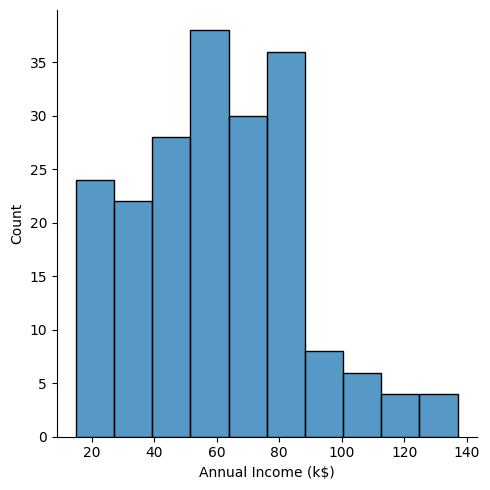

In [88]:
sb.displot(df['Annual Income (k$)']);

In [89]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

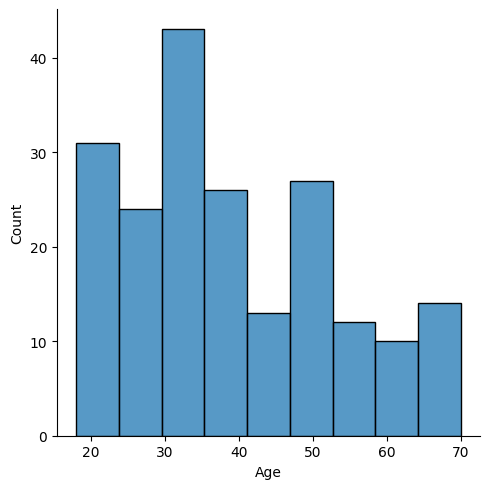

<Figure size 640x480 with 0 Axes>

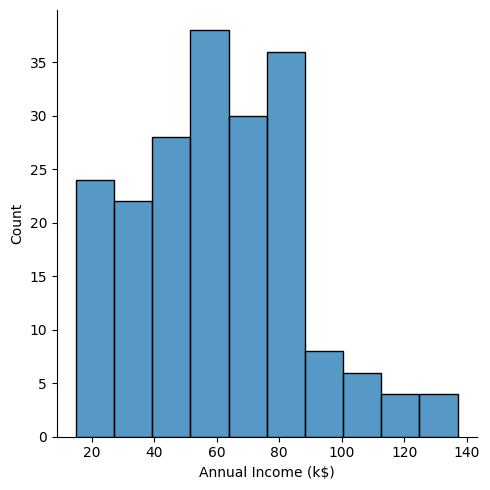

<Figure size 640x480 with 0 Axes>

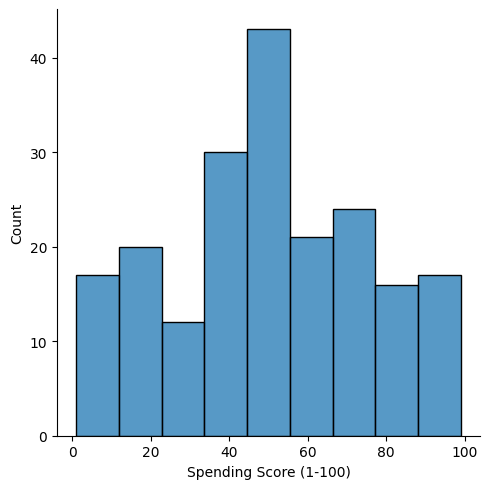

In [90]:
column= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sb.displot(df[i]);

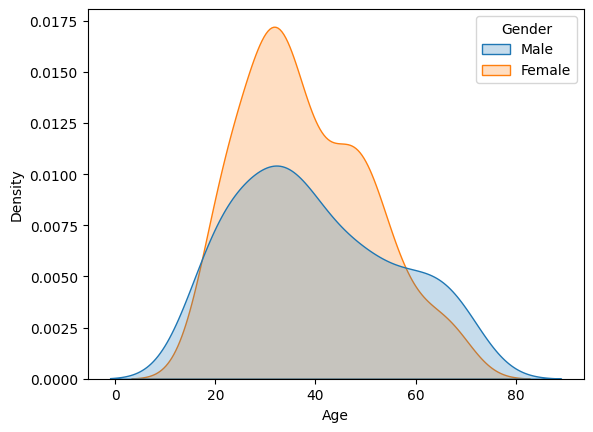

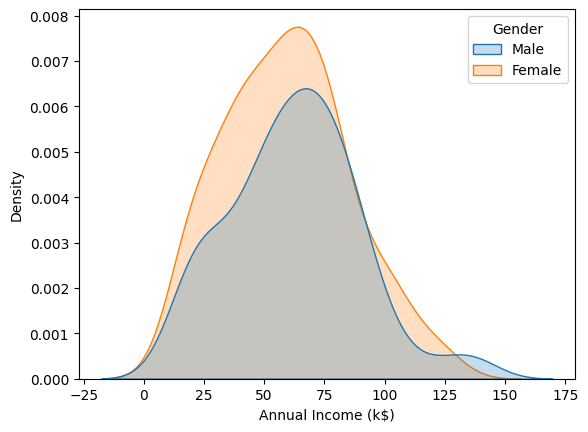

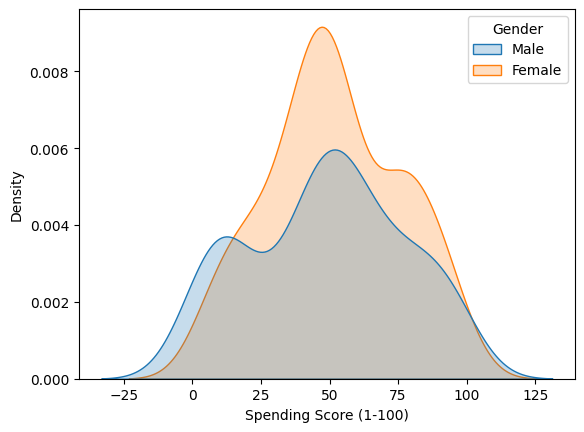

In [91]:
column= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sb.kdeplot(x=df[i],fill = True, hue = df['Gender']);




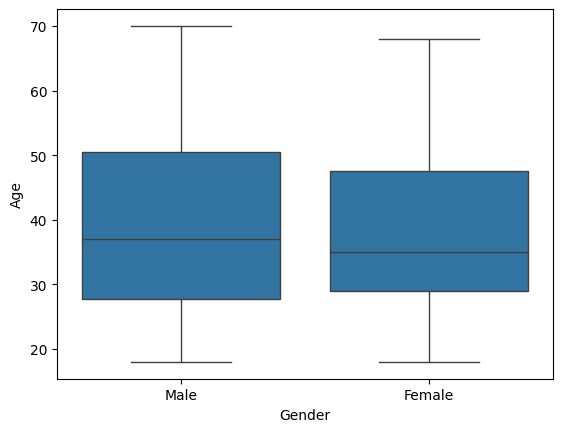

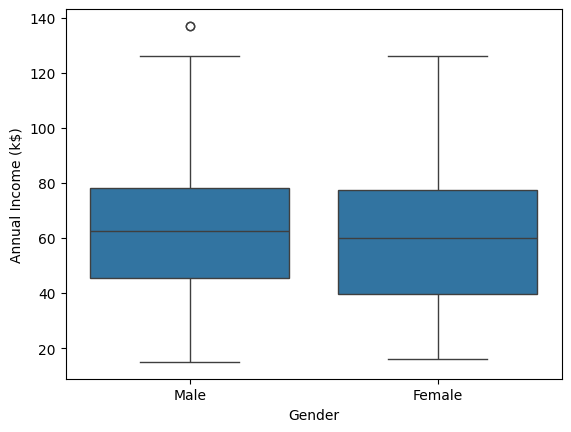

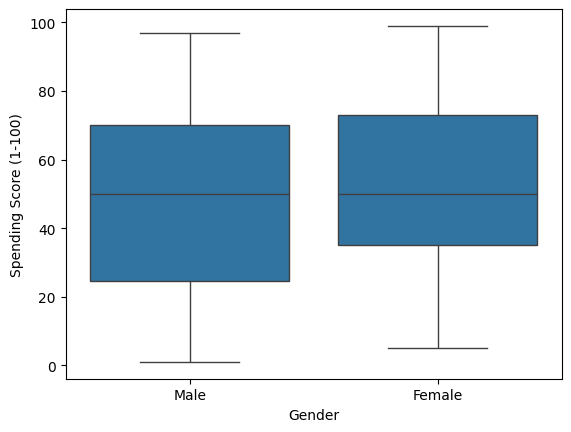

In [92]:
column= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in column:
    plt.figure()
    sb.boxplot(data=df,x='Gender', y=i);

In [93]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#Bivariate

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

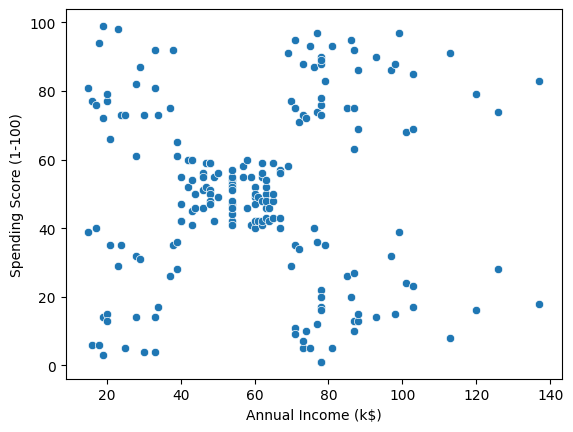

In [94]:
sb.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

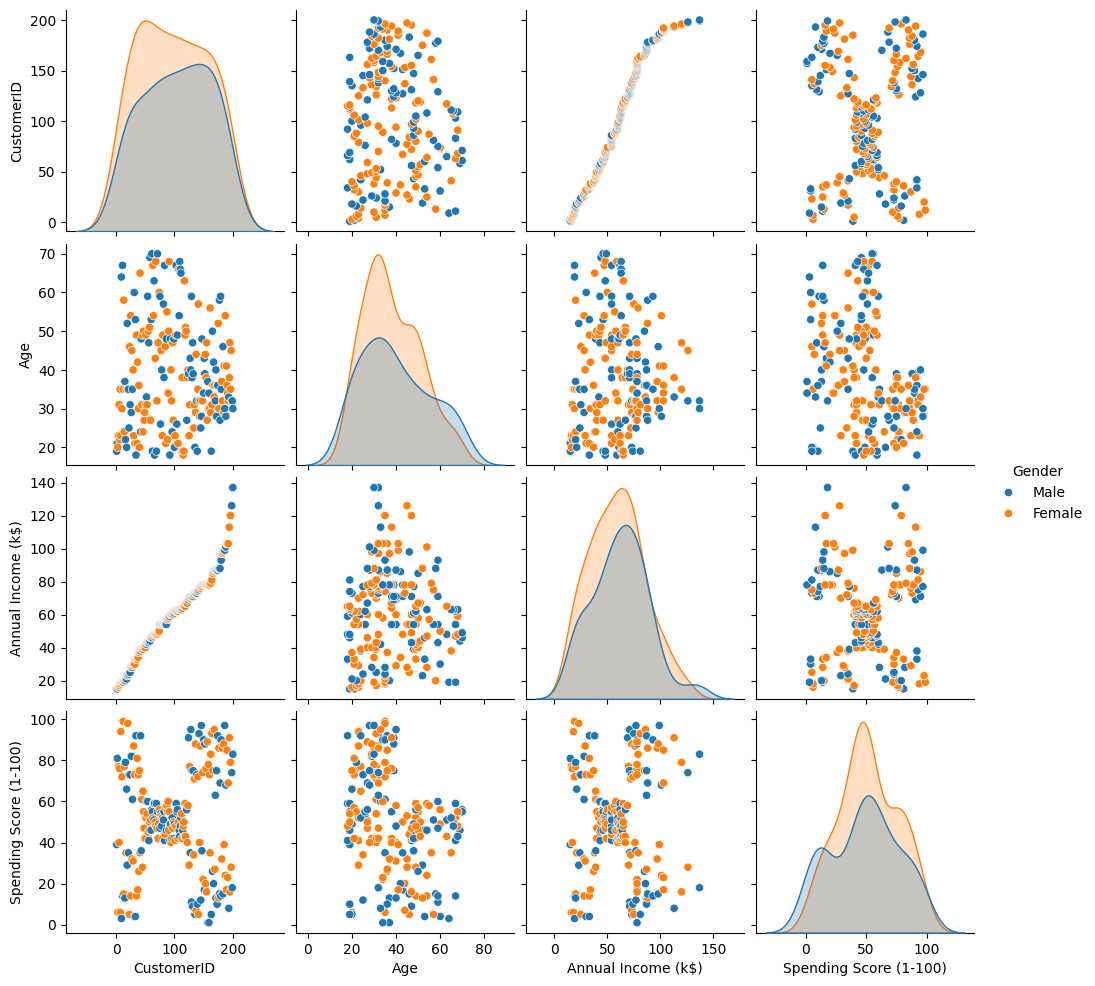

In [95]:
#df=df.drop('CustomerID', axis=1)
sb.pairplot(df,hue='Gender')

In [96]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [97]:
df_numeric = df.drop(columns=['Gender'])
correlation=df_numeric.corr()
correlation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

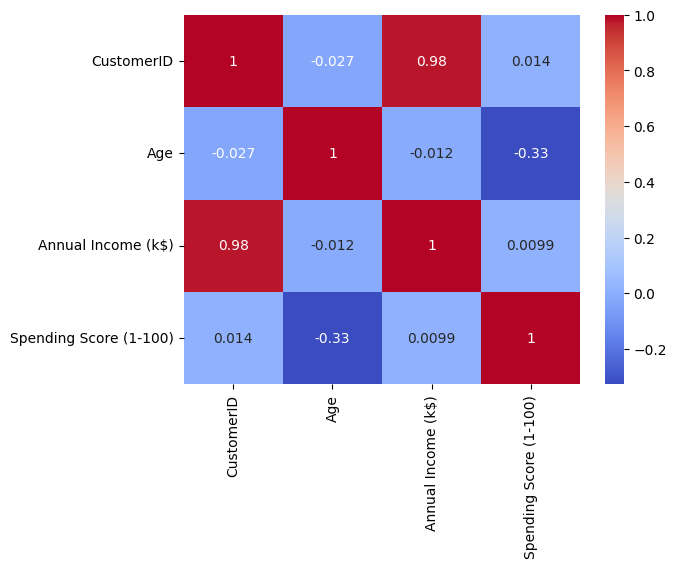

In [98]:
sb.heatmap(correlation, annot=True,cmap='coolwarm')

Clusturing- Univariate, Bivariata and Multivariate

In [99]:
clustering1= KMeans(n_clusters=3)

In [100]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [101]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [102]:
df['Income Cluster']= clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [103]:
df['Income Cluster'].value_counts()

Income Cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [104]:
clustering1.inertia_

23517.330930930933

In [105]:
inertia_score=[]
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i)
    Kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(Kmeans.inertia_)

In [106]:
inertia_score

[137277.28000000003,
 48660.88888888889,
 25640.457784396836,
 13278.112713472485,
 8481.496190476191,
 5050.9047619047615,
 4268.444017094017,
 2831.2960317460324,
 2356.7841575091575,
 1978.5220612720611]

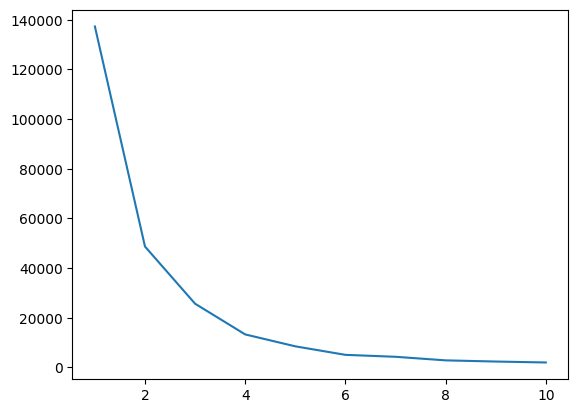

In [107]:
plt.plot(range(1,11),inertia_score)

In [114]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


Bivariate Clustering

In [118]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,4


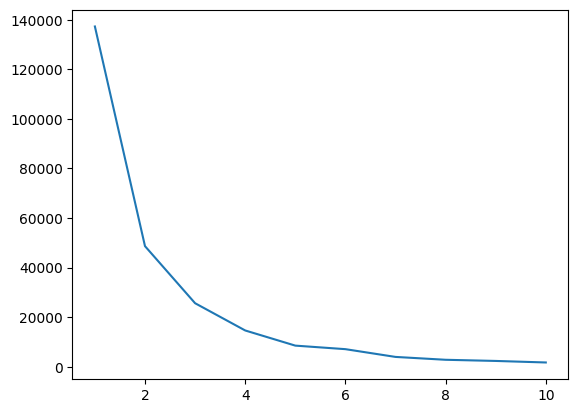

In [119]:
inertia_score2=[]
for i in range(1,11):
    Kmeans2 = KMeans(n_clusters=i)
    Kmeans2.fit(df[['Annual Income (k$)']])
    inertia_score2.append(Kmeans2.inertia_)
inertia_score
plt.plot(range(1,11),inertia_score2)

In [129]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

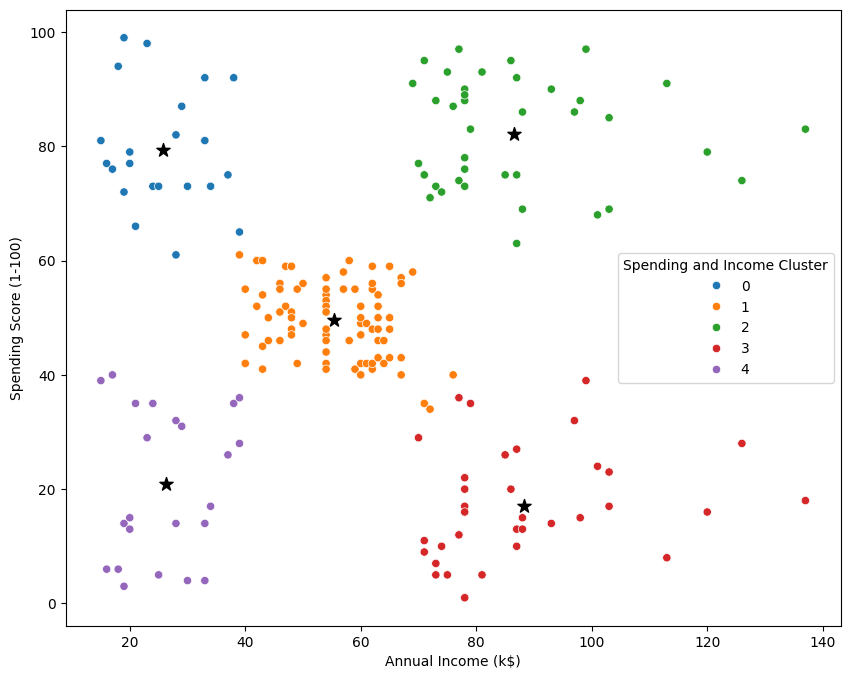

In [130]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sb.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [131]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')


Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [135]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [136]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [137]:
scale = StandardScaler()


In [138]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,4


In [139]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,True
1,2,21,15,81,1,0,True
2,3,20,16,6,1,4,False
3,4,23,16,77,1,0,False
4,5,31,17,40,1,4,False


In [140]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [141]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [142]:
dff = scale.fit_transform(dff)

In [143]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


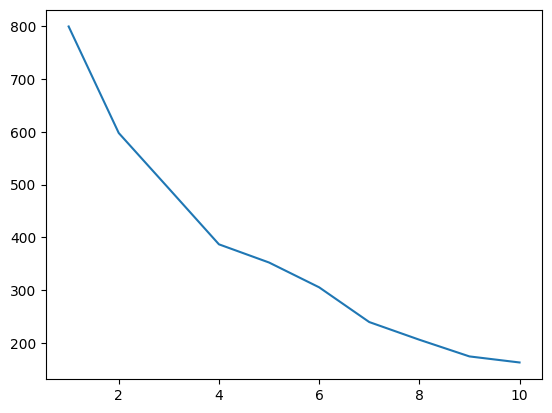

In [144]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [145]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,2,3
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,2,3


In [146]:
df.to_csv('Clustering.csv')